Load Image

In [115]:
import cv2
import numpy as np

unprocessed = r"C:\Users\TarFa\code\climbingBuddy\fastAPI\processing\climbing1.jpeg"
# unprocessed = r"C:\Users\TarFa\code\3climbingLog\fastAPI\testingPhotos\threeColoursTest.jpg"

Crop Image

In [116]:
image = cv2.imread(unprocessed)
# image = image[0:950, 100:800]
image = cv2.resize(image, (300,300), interpolation=cv2.INTER_LINEAR)
blurColor = cv2.blur(image, (3,3))

Canny Contours

In [117]:
gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
blur = cv2.blur(gray, (3,3))

edged = cv2.Canny(blur, 30, 200)

# ret, thresh = cv2.threshold(edged, 127, 255, 0)
contours, hierarchy = cv2.findContours(edged, cv2.RETR_TREE, cv2.CHAIN_APPROX_NONE)


avgColor = []
contourMasks = []
for contour in contours:
    mask = np.zeros(image.shape[:2], np.uint8) # [:2] bc mask must be grayscaled, not coloured like image
    cv2.drawContours(mask, [contour], -1, 255, cv2.FILLED)
    contourMasks.append(mask)

    # cv2.imshow("mask", mask)
    # cv2.waitKey()

    avgColor.append(cv2.mean(image, mask))

# print(avgColor)

# print(len(avgColor))




K-Mean Clustering on averages

In [ ]:

avgColor = np.array(avgColor, dtype=np.float32)
avgColor = avgColor.reshape(-1,3)
criteria = (cv2.TERM_CRITERIA_EPS + cv2.TERM_CRITERIA_MAX_ITER, 20, 1.0) 

noClusters = 8
ret, label, center = cv2.kmeans(avgColor, noClusters, None, criteria, 10, cv2.KMEANS_RANDOM_CENTERS)
# need to use elbow / silloet method to decide no. means

center = np.uint8(center)

# print(center)

labelsAssigned = center[label.flatten()] # this is some beautiful notation... 
# labelsFiltered = filter(lambda x : x == center[0], labelsAssigned)

masksFiltered = []
for index, oneLabel in enumerate(labelsAssigned[:190]): # breaks at 190 - no idea why
    # print(index)
    if np.all(oneLabel == center[0]):
        masksFiltered.append(contourMasks[index])

def showColours(center):
    height, width = (20,20)
    showColours = np.full((height,width,3), (255,255,255), dtype=np.uint8)
    for index, color in enumerate(center):
        showColours = np.concatenate((np.full((height,width, 3), color, dtype=np.uint8), showColours), axis=1)

    return showColours

allColourSquares = showColours(center)

allMasksImage = sum(masksFiltered)

cv2.imshow("image", image)
cv2.imshow("blur", blurColor)
cv2.imshow("canny", edged)
cv2.imshow("blurred", allMasksImage)
cv2.imshow("colours", allColourSquares)
cv2.waitKey(0)



cv2.destroyAllWindows()

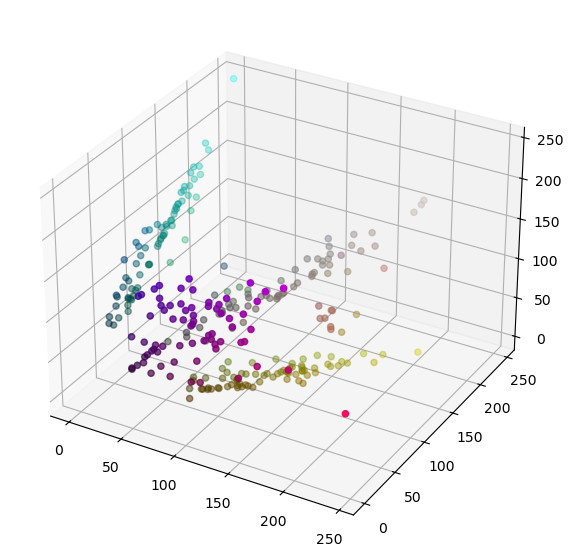

In [119]:
import matplotlib.pyplot as plt

fig = plt.figure(figsize = (10, 7))
ax = plt.axes(projection="3d")

avgColor = np.array([[red, green, blue] for blue, green, red in avgColor])
# print(avgColor)

ax.scatter3D(avgColor[:,0], avgColor[:,1], avgColor[:,2], color=avgColor/255)
plt.show()

K-mean clustering Straight on image

In [120]:

HSVBlur = cv2.cvtColor(image, cv2.COLOR_BGR2HSV)
data = np.float32(HSVBlur).reshape((-1, 3))

criteria = (cv2.TERM_CRITERIA_EPS + cv2.TERM_CRITERIA_MAX_ITER, 20, 1.0) 

ret, label, center = cv2.kmeans(data, 10, None, criteria, 10, cv2.KMEANS_RANDOM_CENTERS)

center = np.uint8(center)
# print(center[[1,2,3,3,3]])

result = center[label.flatten()] # this is some beautiful notation... 
result = result.reshape(HSVBlur.shape)
result = cv2.cvtColor(result, cv2.COLOR_HSV2BGR)




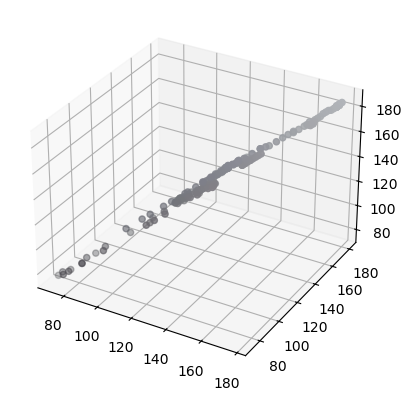

sad


In [121]:
# %matplotlib widget

import matplotlib.pyplot as plt
# from mpl_toolkits.mplot3d import Axes3D

image = cv2.resize(image, (400,400), interpolation=cv2.INTER_LINEAR)

pixels = np.array(image).reshape(-1, image.shape[-1])

colours = pixels / 255


fig = plt.figure()
ax = fig.add_subplot(projection="3d")

n = 200
pixels = pixels[:n]
blue, green, red = pixels[:, 0], pixels[:, 1], pixels[:, 2]

ax.scatter(blue, green, red, c=colours[:n], marker="o")

# plt.ion()

plt.show()

print("sad")




In [122]:
# cv2.imshow("canny edged", edged)
# cv2.imshow("blurred", blur)
# cv2.imshow("blurred", image)
# cv2.waitKey(0)



cv2.destroyAllWindows()